<a href="https://colab.research.google.com/github/rajeevfromkrec/pytorch/blob/master/Image_classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torch.nn.functional as F
import torch.nn as nn

In [7]:
dataset= MNIST(root='data/',download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
len(dataset)

60000

In [9]:
test_dataset= MNIST(root='data/' ,train=False)

In [10]:
len(test_dataset)

10000

In [11]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F2A9950E400>, 5)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

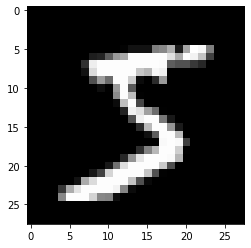

In [13]:
image, label= dataset[0]
plt.imshow(image, cmap='gray')

In [15]:
import torchvision.transforms as transforms

In [16]:
dataset= MNIST(root='data/',transform=transforms.ToTensor(),train=True)

In [17]:
image_tensor, label =dataset[0]
image_tensor.shape

torch.Size([1, 28, 28])

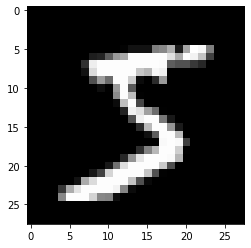

In [18]:
plt.imshow(image_tensor.reshape(28,28), cmap='gray')

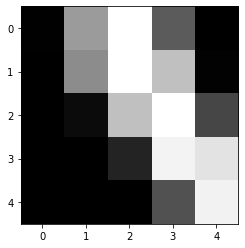

In [19]:
plt.imshow(image_tensor[0,10:15,10:15], cmap='gray');


In [20]:
from torch.utils.data import random_split

In [21]:
train_ds, val_ds= random_split(dataset, [50000, 10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [22]:



from torch.utils.data import DataLoader

In [23]:
batch_size=128

In [24]:
train_loader= DataLoader(train_ds,batch_size,shuffle=True, drop_last=True)
val_loader= DataLoader(val_ds, batch_size,drop_last=True)



In [25]:
import torch.nn as nn

In [26]:
input_size= 28*28
num_classes=10
model= nn.Linear(input_size, num_classes)

In [27]:
print(model.weight.shape)

torch.Size([10, 784])


In [28]:
model.weight

Parameter containing:
tensor([[ 0.0138, -0.0019, -0.0061,  ..., -0.0271,  0.0201,  0.0092],
        [ 0.0025,  0.0142,  0.0281,  ..., -0.0273, -0.0289,  0.0349],
        [ 0.0071,  0.0356,  0.0241,  ...,  0.0159,  0.0151,  0.0054],
        ...,
        [-0.0055,  0.0070, -0.0167,  ..., -0.0156,  0.0118, -0.0014],
        [-0.0057,  0.0289,  0.0035,  ...,  0.0170, -0.0266,  0.0285],
        [ 0.0018, -0.0021,  0.0078,  ..., -0.0338,  0.0165, -0.0283]],
       requires_grad=True)

In [32]:
model.bias

Parameter containing:
tensor([-0.0185, -0.0016, -0.0137,  0.0060, -0.0190,  0.0261, -0.0093, -0.0054,
        -0.0318,  0.0345], requires_grad=True)

In [33]:
for images,label in train_loader:
  print(label)
  print(images.shape)
  outputs=model(images)
  break

tensor([6, 8, 5, 2, 6, 4, 1, 8, 4, 4, 7, 4, 1, 2, 1, 0, 1, 0, 6, 4, 2, 7, 7, 9,
        6, 4, 1, 1, 0, 7, 8, 1, 0, 1, 0, 9, 1, 4, 2, 9, 6, 3, 8, 8, 6, 2, 9, 2,
        6, 7, 7, 8, 0, 7, 0, 5, 5, 4, 0, 6, 0, 1, 9, 4, 2, 6, 4, 7, 5, 6, 2, 9,
        6, 3, 0, 7, 7, 9, 7, 8, 9, 7, 3, 9, 7, 9, 0, 1, 8, 0, 4, 7, 5, 7, 6, 0,
        8, 0, 6, 8, 7, 5, 5, 9, 3, 2, 7, 5, 5, 3, 4, 2, 2, 2, 7, 0, 0, 1, 8, 6,
        1, 5, 2, 0, 8, 1, 4, 0])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [34]:
class Mnistmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size, num_classes)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out

In [35]:
model=Mnistmodel()

In [36]:
print( model.linear.weight.shape)

torch.Size([10, 784])


In [37]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0312,  0.0195, -0.0280,  ...,  0.0047, -0.0339,  0.0116],
         [-0.0094, -0.0181,  0.0107,  ...,  0.0252,  0.0057, -0.0219],
         [-0.0308, -0.0045,  0.0024,  ...,  0.0162, -0.0274, -0.0293],
         ...,
         [ 0.0354, -0.0194, -0.0059,  ...,  0.0064, -0.0025, -0.0108],
         [ 0.0333, -0.0142, -0.0061,  ...,  0.0240,  0.0308, -0.0270],
         [-0.0273, -0.0079, -0.0270,  ...,  0.0254,  0.0216, -0.0151]],
        requires_grad=True), Parameter containing:
 tensor([-0.0208, -0.0345, -0.0079,  0.0352,  0.0137, -0.0141, -0.0267, -0.0275,
          0.0076,  0.0087], requires_grad=True)]

In [38]:
for inages, labels in train_loader:
  output=model(images)
  break


In [39]:
print(output.shape)

torch.Size([128, 10])


In [40]:
output[:2,:].data

tensor([[ 0.0458, -0.0403, -0.1109, -0.0055,  0.2545, -0.0934, -0.1108, -0.3022,
          0.1939,  0.0926],
        [ 0.0485, -0.1421,  0.0241,  0.0863,  0.2379, -0.0176, -0.0927, -0.3522,
          0.1382,  0.1934]])

In [41]:
import torch.nn.functional as F

In [42]:
probs=F.softmax(output,dim=1)

In [43]:
probs[:2].data

tensor([[0.1042, 0.0956, 0.0891, 0.0990, 0.1284, 0.0907, 0.0891, 0.0736, 0.1209,
         0.1092],
        [0.1023, 0.0846, 0.0999, 0.1063, 0.1237, 0.0958, 0.0888, 0.0685, 0.1119,
         0.1183]])

In [44]:
torch.sum(probs[0]).item()

1.0

In [45]:
max_probs,pred=torch.max(probs, dim=1)

In [46]:
print(pred)

tensor([4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 8, 3, 2, 9, 3, 9, 3, 9, 9, 9, 0, 9, 9,
        8, 9, 3, 6, 6, 9, 9, 9, 9, 3, 3, 9, 3, 0, 9, 9, 3, 3, 9, 4, 4, 0, 9, 0,
        9, 9, 3, 9, 3, 3, 6, 3, 9, 8, 3, 4, 9, 9, 9, 9, 8, 8, 9, 3, 3, 9, 3, 9,
        9, 3, 4, 9, 9, 9, 6, 3, 9, 9, 4, 9, 9, 8, 6, 9, 9, 3, 9, 9, 9, 9, 3, 9,
        9, 3, 9, 9, 9, 9, 4, 9, 9, 4, 9, 3, 1, 3, 9, 0, 0, 2, 9, 3, 3, 3, 4, 9,
        9, 3, 4, 4, 3, 3, 9, 4])


In [47]:
def accuracy(output, labels):
  _,preds= torch.max(output, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [48]:
accuracy(output,labels)

tensor(0.0703)

In [49]:
loss_fn= F.cross_entropy

loss= loss_fn(output,labels)
print(loss.item())

2.314624786376953


In [50]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

        self.dropout=nn.Dropout(.2)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.dropout(F.relu(self.fc1(xb)))
        out = self.dropout(F.relu(self.fc2(out)))
        out = self.dropout(F.relu(self.fc3(out)))
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [51]:
model

MnistModel(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [52]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [53]:
def fit(epochs, lr,model,train_loader,val_loader,opt_func= torch.optim.SGD):
  history=[]
  optimizer =opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result=evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [54]:
evaluate(model,val_loader)

{'val_acc': 0.10566907376050949, 'val_loss': 2.3041815757751465}

In [55]:
history1= fit(5, .001, model,train_loader, val_loader)

Epoch [0], val_loss: 2.3011, val_acc: 0.1189
Epoch [1], val_loss: 2.2983, val_acc: 0.1320
Epoch [2], val_loss: 2.2950, val_acc: 0.1503
Epoch [3], val_loss: 2.2920, val_acc: 0.1697
Epoch [4], val_loss: 2.2874, val_acc: 0.1990


In [56]:
history2= fit(5, .001, model,train_loader, val_loader)

Epoch [0], val_loss: 2.2827, val_acc: 0.2202
Epoch [1], val_loss: 2.2750, val_acc: 0.2570
Epoch [2], val_loss: 2.2657, val_acc: 0.2924
Epoch [3], val_loss: 2.2567, val_acc: 0.3166
Epoch [4], val_loss: 2.2449, val_acc: 0.3366


In [57]:
history3= fit(5, .001, model,train_loader, val_loader)

Epoch [0], val_loss: 2.2311, val_acc: 0.3596
Epoch [1], val_loss: 2.2151, val_acc: 0.3658
Epoch [2], val_loss: 2.1977, val_acc: 0.3712
Epoch [3], val_loss: 2.1751, val_acc: 0.3747
Epoch [4], val_loss: 2.1494, val_acc: 0.3784


In [58]:
history4= fit(5, .001, model,train_loader, val_loader)

Epoch [0], val_loss: 2.1242, val_acc: 0.3774
Epoch [1], val_loss: 2.0896, val_acc: 0.3805
Epoch [2], val_loss: 2.0521, val_acc: 0.3868
Epoch [3], val_loss: 2.0141, val_acc: 0.3872
Epoch [4], val_loss: 1.9768, val_acc: 0.3903


In [ ]:
test_dataset= MNIST(root='data/', train=False, transform=transforms.ToTensor())

In [ ]:
img,label= test_dataset[1]

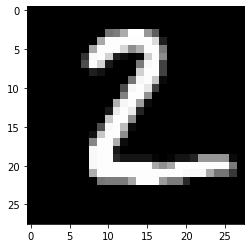

In [ ]:
plt.imshow(img[0], cmap='gray')

In [ ]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
def predict_model(img, model):
  xb=img.unsqueeze(0)
  yb=model(xb)
  _, preds= torch.max(yb, dim=1)
  return preds.item()

In [ ]:
predict_model(img,model)

2